# STA 141B Assignment 5

Due __Mar 4, 2019__ by 11:59pm. Submit by editing this file, committing the changes with git, and then pushing to your private GitHub repo for the assignment. This assignment will be graded according to the class rubric.

Please do not rename this file or delete the exercise cells, because it will interfere with our grading tools. Put your answers in new cells after each exercise. You can make as many new cells as you like. Use code cells for code and Markdown cells for text. Answer all questions with complete sentences.

The purpose of this assignment is to practice accessing and analyzing data in a database.

__For full credit, do most of your work in SQL.__ Subsetting, sorting, grouping, aggregation, and merging can all be done in SQL. It is okay to use Python code for parts of your analysis that are difficult or impossible to do in SQL, such as creating visualizations or computing statistics (other than the mean).

## Lahman's Baseball Database

In this assignment, you'll use SQL queries and __pandas__ to explore data in [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/), which contains "complete batting and pitching statistics from 1871 to 2018, plus fielding statistics, standings, team stats, managerial records, post-season data, and more."

You can download the database in SQLite format [HERE](https://anson.ucdavis.edu/~nulle/baseball.sqlite).

Documentation for the database, including a description of all tables, is in the `README.md` file included in this repository.

__Exercise 1.1.__ 

1. From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

2. Is there any general trend in payrolls over this time period?

3. There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

4. How do the top 5 teams compare to other teams?

In [93]:
# Import library 
import numpy as np
import pandas as pd
import sqlite3 as sql
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


# Gether the data

In [116]:
# connect the data
db = sql.connect("../assignment-5-hushuli/baseball.sqlite")

In [117]:
# read sql 
df = pd.read_sql("SELECT * FROM sqlite_master", db)

In [118]:
# read team table to current
pd.read_sql("SELECT * FROM teams WHERE yearid BETWEEN 2006 AND 2016 LIMIT 3;",db)

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,2006,AL,BAL,BAL,E,4,162,81.0,70,92,...,156,0.983,Baltimore Orioles,Oriole Park at Camden Yards,2153139.0,99,100,BAL,BAL,BAL
1,2006,AL,BOS,BOS,E,3,162,81.0,86,76,...,174,0.989,Boston Red Sox,Fenway Park II,2930588.0,105,104,BOS,BOS,BOS
2,2006,AL,CHA,CHW,C,3,162,81.0,90,72,...,145,0.985,Chicago White Sox,U.S. Cellular Field,2957414.0,104,104,CHW,CHA,CHA


In [98]:
# read salaries table
pd.read_sql("SELECT * FROM salaries WHERE yearid BETWEEN 2006 AND 2016 LIMIT 3",db)

,yearID,teamID,lgID,playerID,salary
0,2006,ARI,NL,aquingr01,342000
1,2006,ARI,NL,batismi01,4750000
2,2006,ARI,NL,byrneer01,2250000


# __1.1.1__  From 2006 to 2016, which 5 teams had the highest payrolls? Payroll means the sum of the salaries for all people on the team in a given year.

In [99]:
#Join teams table and salary table, add total payroll column in to the df table
df = pd.read_sql("""
    SELECT s.*, t.teamID, t.yearid, t.name FROM 
        (SELECT SUM(salary) AS total, yearid, teamid FROM 
            Salaries
        WHERE yearid BETWEEN 2006 AND 2016 
        GROUP BY teamid, yearid
        ) AS s
    INNER JOIN 
        teams AS t
    ON s.teamid = t.teamid AND s.yearid = t.yearID
    ORDER BY total DESC
""",db)
df.head()

,total,yearid,teamid,teamID,yearID,name
0,231978886,2013,NYA,NYA,2013,New York Yankees
1,223362196,2013,LAN,LAN,2013,Los Angeles Dodgers
2,222997792,2016,NYA,NYA,2016,New York Yankees
3,221288380,2016,LAN,LAN,2016,Los Angeles Dodgers
4,217014600,2014,LAN,LAN,2014,Los Angeles Dodgers


In [100]:
#top 5
top = df.drop_duplicates('name').head(5)
# Drop the duplicates'''
top = top.reset_index()
# reset index for better plot'''
top

,index,total,yearid,teamid,teamID,yearID,name
0,0,231978886,2013,NYA,NYA,2013,New York Yankees
1,1,223362196,2013,LAN,LAN,2013,Los Angeles Dodgers
2,13,194876481,2016,DET,DET,2016,Detroit Tigers
3,16,188545761,2016,BOS,BOS,2016,Boston Red Sox
4,18,180944967,2014,PHI,PHI,2014,Philadelphia Phillies


# Summary
The top five had highest payroll are New York Yankees, Los Angeles Dodgers, Detroit Tigers, Boston Red Sox, Philadelphia Phillies

# 1.1.2  Is there any general trend in payrolls over this time period?

In [101]:
# get payroll information from 2006 to 2016 for the top 5 payroll teams
top_salary = df.loc[df["name"].isin(top['name']),:]  # Select top 5 teams in df
top_salary = top_salary.sort_values(by = 'yearid') # Sort the value by year, so we can clear to see the data structure

top_salary.shape  # make sure we get enough row

(55, 6)

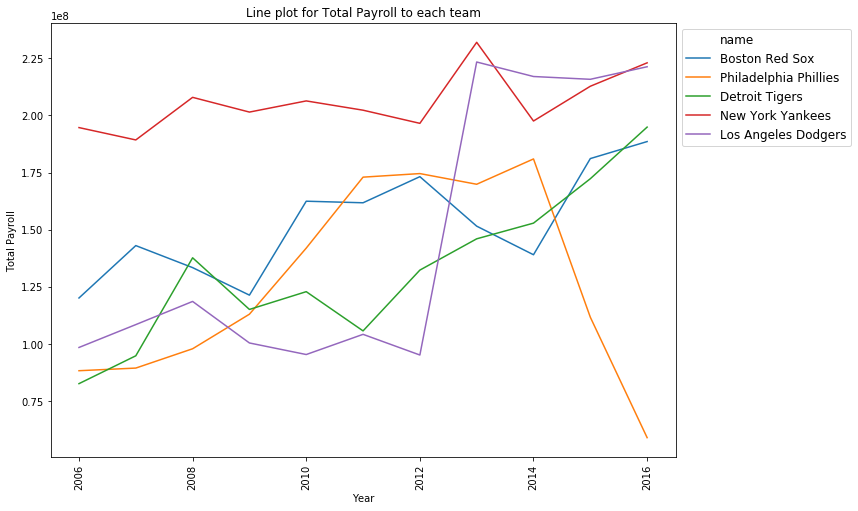

In [102]:
# plot the time vs payroll
fig=plt.figure(figsize=(14,8))
ax=fig.add_subplot(111)

sns.lineplot("yearid", "total", hue = "name", data = top_salary)
ax.set_title("Line plot for Total Payroll to each team")
ax.set_xlabel("Year")
ax.set_ylabel("Total Payroll")
for tick in ax.get_xticklabels():
    tick.set_rotation("vertical")
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1, 1),prop={'size': 12}) # put legend to the outside of plot


# Summary
From the plot, we can see the New York Yankees have the general highest total payroll from 2006 till 2016. But they have a big increase around 2012 to 2014, And after that , the total payroll back to average which is similar than before but still increasing. For the team Los Angeles Dodgers, Their team total payroll are lower than other teams at first few years. They have a dramtic increase in 2012 and most catched the New York Yankees. And after that, The Los Angeles Dodgers is keep in highest total payroll. For the Philadelphia phillies, they were increase slowly from 2006 till 2011. And from 2011 till 2014, they were just keep stat the stable level. However, in 2014, they have a destrutive decrease from the stable level. And it is the only team trend to the decrease at end of 2016 amount the 5 teams. For the Detroit Tigers and Boston Red Sox, they had slowly increasing trend. Even they had small decreases but the whole trend is still increasing.

# 1.1.3 There are at least 2 anomalies in the payrolls over this time period. What are they, and can you find information (online or elsewhere) to explain them?

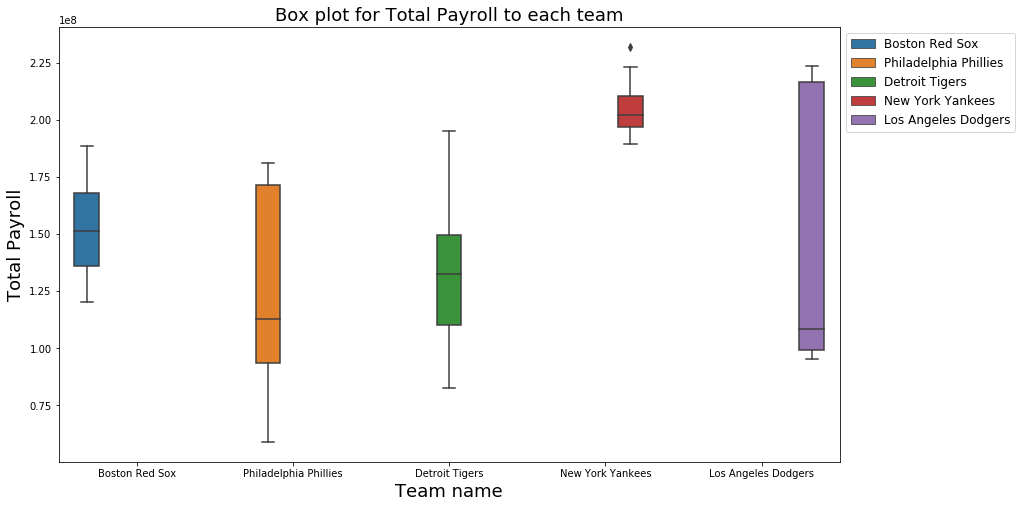

In [103]:
# plot the time vs payroll
fig=plt.figure(figsize=(14,8))
ax=fig.add_subplot(111)

sns.boxplot("name", "total", hue = "name", data = top_salary)
ax.set_title("Box plot for Total Payroll to each team",fontsize=18)
ax.set_xlabel("Team name",fontsize=18)
ax.set_ylabel("Total Payroll",fontsize=18)

# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1, 1),prop={'size': 12}) # put legend to the outside of plot


# Summary
From the box plot, we can see Philadelphia and LA Dodgers are most anomalies teams. The has the big varience in total payroll/ The Los Angeles Dodgers and Philadelphia phillies are similar at first few years that they both are at lower payroll. The Philadelphia phillies had a small increase over the years but the Los Angeles Dodgers are around at lowest level payroll. However, Los Angeles have a big jump at 2012 from the lowest payroll to the one of the highest payroll over this period. Philadelphia phillies have a destrutive drop at 2015 and countions.

When I search online, For LA Dodger, I think the only thing related is they changed the team manager after they move to LA. This is maybe is a reason.

This news: https://www.forbes.com/sites/briansolomon/2012/03/29/2-billion-dodgers-sale-tops-list-of-most-expensive-sports-team-purchases-ever/#370dd5224206

# 1.1.4 How do the top 5 teams compare to other teams?

In [106]:
#get all data except top 5
other = df.loc[~df["name"].isin(top['name']),:]
other.sort_values(by = 'yearid')

#looking for each year
years = other['yearID'].unique()
def other_salary(year):  
    return other[other['yearID'] == year].mean()
salary = [other_salary(y) for y in years]

#change the name
salary = pd.DataFrame(salary)
salary['name'] = 'Not Top teams'
salary.head()

,total,yearid,yearID,name
0,1.145380e+08,2016.0,2016.0,Not Top teams
1,1.048207e+08,2015.0,2015.0,Not Top teams
2,9.219755e+07,2014.0,2014.0,Not Top teams
3,8.644199e+07,2012.0,2012.0,Not Top teams
4,8.053712e+07,2009.0,2009.0,Not Top teams


In [108]:
# get the data all top 5
top_salary.sort_values(by = 'yearid')

#looking for each year
years = top_salary['yearID'].unique()
def other_salary(year):  
    return top_salary[top_salary['yearID'] == year].mean()
tsalary = [other_salary(y) for y in years]

#change the name
topsalary = pd.DataFrame(tsalary)
topsalary['name'] = 'Top Teams'
topsalary.head()

,total,yearid,yearID,name
0,116819257.8,2006.0,2006.0,Top Teams
1,124993673.0,2007.0,2007.0,Top Teams
2,139088087.2,2008.0,2008.0,Top Teams
3,130259794.2,2009.0,2009.0,Top Teams
4,145786409.0,2010.0,2010.0,Top Teams


In [110]:
#concate the top 5 team and other teams
concat_teams = pd.concat([topsalary, salary],sort=True)
concat_teams.head()

,name,total,yearID,yearid
0,Top Teams,116819257.8,2006.0,2006.0
1,Top Teams,124993673.0,2007.0,2007.0
2,Top Teams,139088087.2,2008.0,2008.0
3,Top Teams,130259794.2,2009.0,2009.0
4,Top Teams,145786409.0,2010.0,2010.0


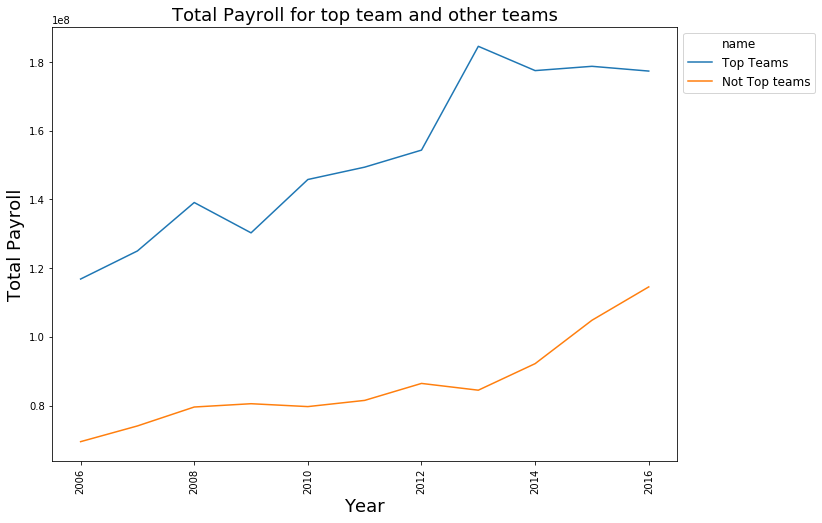

In [111]:
fig=plt.figure(figsize=(14,8))
ax=fig.add_subplot(111)
ax = sns.lineplot("yearID", "total",hue = 'name', data = concat_teams)
    
ax.set_title("Total Payroll for top team and other teams",fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Total Payroll",fontsize=18)
for tick in ax.get_xticklabels():
    tick.set_rotation("vertical")
    
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
plt.legend(bbox_to_anchor=(1, 1),prop={'size': 12}) # put legend to the outside of plot


From the plot we can see that compare with top 5 team, others average salary is lower than top 5 teams. The only interact is the Philadelphia had lower than other team.  

__Exercise 1.2.__ Ask and use the database to answer 3 questions about baseball. For each question, write at least 2-3 paragraphs (~150 words) and support your answer with plots. If you feel like you don't have enough to write for a question, you probably aren't investigating follow up questions (inspired your original question) as carefully as you should.

__Try to come up with your own questions__, but here are two examples of reasonable questions:

* Is it common for players to switch teams? Has this changed over time? Which players have been on the most teams, and how many were they on?
* How much have salaries increased over the years in [real dollars](https://en.wikipedia.org/wiki/Real_versus_nominal_value_(economics))? The `salary` column in the `Salaries` table is in nominal dollars, so you will need to get Consumer Price Index data online if you want to answer this question. Is there a corresponding increase in performance?

Please make sure to clearly state each of your questions in your submission.

In [119]:
# read table 
pd.read_sql("SELECT * FROM sqlite_master", db)

,type,name,tbl_name,rootpage,sql
0,table,Fielding,Fielding,2,"CREATE TABLE ""Fielding"" (\n""playerID"" TEXT,\n ..."
1,index,IndexFielding,Fielding,3,CREATE INDEX IndexFielding ON Fielding (player...
2,table,CollegePlaying,CollegePlaying,2280,"CREATE TABLE ""CollegePlaying"" (\n""playerID"" TE..."
3,index,IndexCollegePlaying,CollegePlaying,2282,CREATE INDEX IndexCollegePlaying ON CollegePla...
4,table,FieldingOF,FieldingOF,2355,"CREATE TABLE ""FieldingOF"" (\n""playerID"" TEXT,\..."
5,index,IndexFieldingOF,FieldingOF,2357,CREATE INDEX IndexFieldingOF ON FieldingOF (pl...
6,table,Salaries,Salaries,2408,"CREATE TABLE ""Salaries"" (\n""yearID"" INTEGER,\n..."
7,index,IndexSalaries,Salaries,2410,CREATE INDEX IndexSalaries ON Salaries (yearID...
8,table,TeamsHalf,TeamsHalf,2520,"CREATE TABLE ""TeamsHalf"" (\n""yearID"" INTEGER,\..."
9,index,IndexTeamsHalf,TeamsHalf,11561,CREATE INDEX IndexTeamsHalf ON TeamsHalf (year...


# 2.1 What is the salary trend for the players who got 30+ awards?

In [125]:
# select the player who got 30+ awards
df = pd.read_sql(""" 
     SELECT a.awardid, b.* FROM    
        (SELECT * FROM 
            AwardsPlayers
        GROUP BY playerID
        HAVING COUNT(awardid) > 30
        ORDER BY playerID) AS a
        JOIN
            Salaries AS b
        ON a.playerid = b.playerid
        ORDER BY playerid
""",db)
df.head()

,awardID,yearID,teamID,lgID,playerID,salary
0,Gold Glove,1986,PIT,NL,bondsba01,60000
1,Gold Glove,1987,PIT,NL,bondsba01,100000
2,Gold Glove,1988,PIT,NL,bondsba01,220000
3,Gold Glove,1989,PIT,NL,bondsba01,360000
4,Gold Glove,1990,PIT,NL,bondsba01,850000


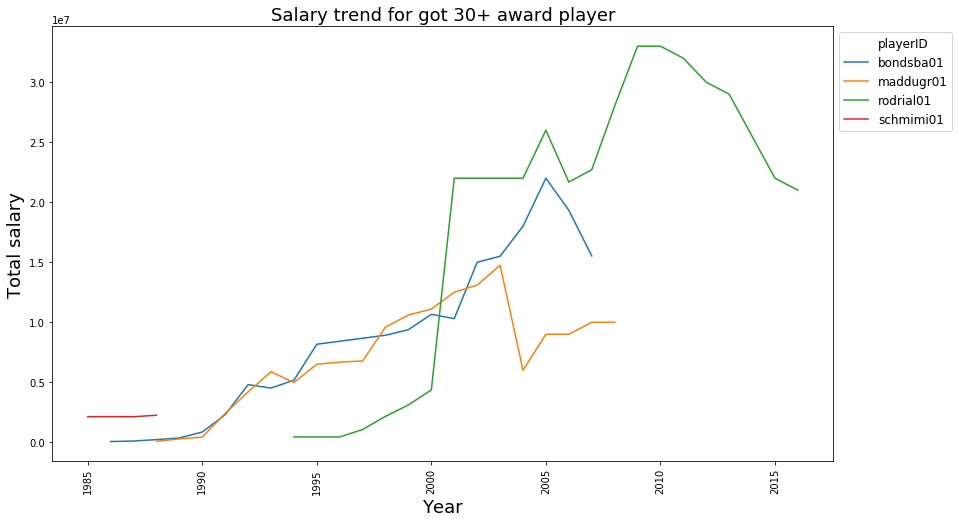

In [126]:
# plot
fig=plt.figure(figsize=(14,8))
ax=fig.add_subplot(111)
sns.lineplot("yearID", "salary", hue = 'playerID', data = df)
    
ax.set_title("Salary trend for got 30+ award player",fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Total salary",fontsize=18)
for tick in ax.get_xticklabels():
    tick.set_rotation("vertical")
    
# Put a legend to the right of the current axis
legend = plt.legend(bbox_to_anchor=(1, 1),prop={'size': 12}) # put legend to the outside of plot

ax

# 2.2 Is there have any anomalies?

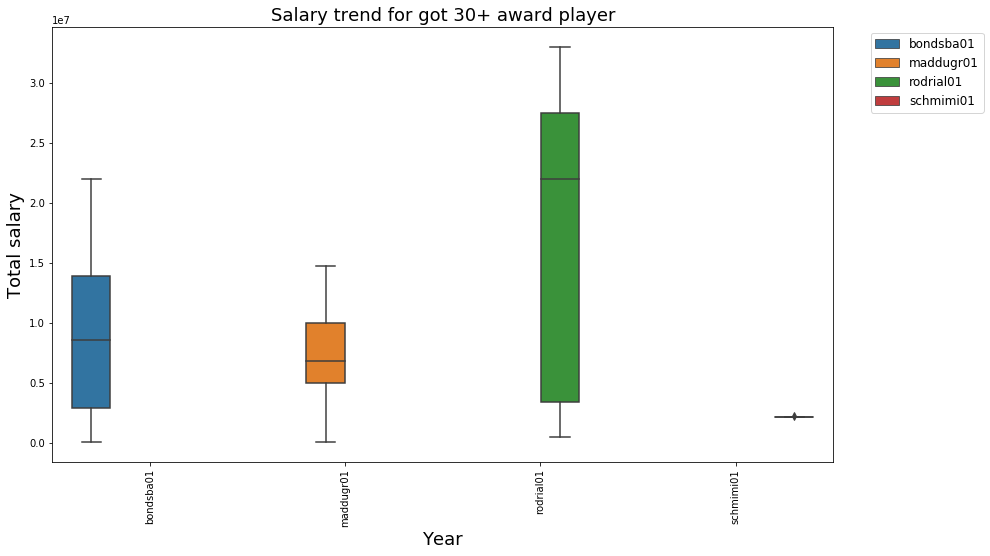

In [130]:
# plot
fig=plt.figure(figsize=(14,8))
ax=fig.add_subplot(111)
sns.boxplot("playerID", "salary", hue = 'playerID', data = df)
    
ax.set_title("Salary trend for got 30+ award player",fontsize=18)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("Total salary",fontsize=18)
for tick in ax.get_xticklabels():
    tick.set_rotation("vertical")
    
# Put a legend to the right of the current axis
legend = plt.legend(bbox_to_anchor=(1.2, 1),prop={'size': 12}) # put legend to the outside of plot

ax

# Summary

From the plot we can see the player who got 30+ award the salary wil keep going up but not always increase. two of the players are get decrease when they go certain point in there career years. Mostly happen at end of his career life. rodrial01 salary is highest one. His increase look unusual than others. Maybe he is a talent players.

But another player schmim01 had a short career life but he got 30+ in this short career award compare with other player got same amount award but serving the team over 10 years. But from df we can see he acually have play from 1974 to 1986. But I dont know why the data only give his 4 years play salary. Overall, we will know the play get more award they will get more pay.

# 2.3 Is serving year effect people average playroll?


In [131]:
data = pd.read_sql("""
SELECT AVG(salary) AS ave_salary, * FROM
    (SELECT (finalGame - debut) AS serving_year, p.debut, p.finalGame, t.* FROM 
        People AS p
    JOIN
        salaries AS t
    ON p.playerID = t.playerID) 
    
    GROUP BY serving_year
    ORDER BY serving_year
""",db)
data.head()

,ave_salary,serving_year,debut,finalGame,yearID,teamID,lgID,playerID,salary
0,294457.710280,0,1986-07-30,1986-09-25,1986,ATL,NL,speckcl01,60000
1,466309.973333,1,1986-05-06,1987-07-10,1986,CHA,AL,mckeojo01,60000
2,373800.998294,2,1984-04-05,1986-07-21,1985,CAL,AL,romanro01,146500
3,457609.247945,3,1983-06-30,1986-10-01,1985,CHN,NL,fontera01,200000
4,603216.345473,4,1984-09-17,1988-10-01,1985,CAL,AL,clibust02,60000


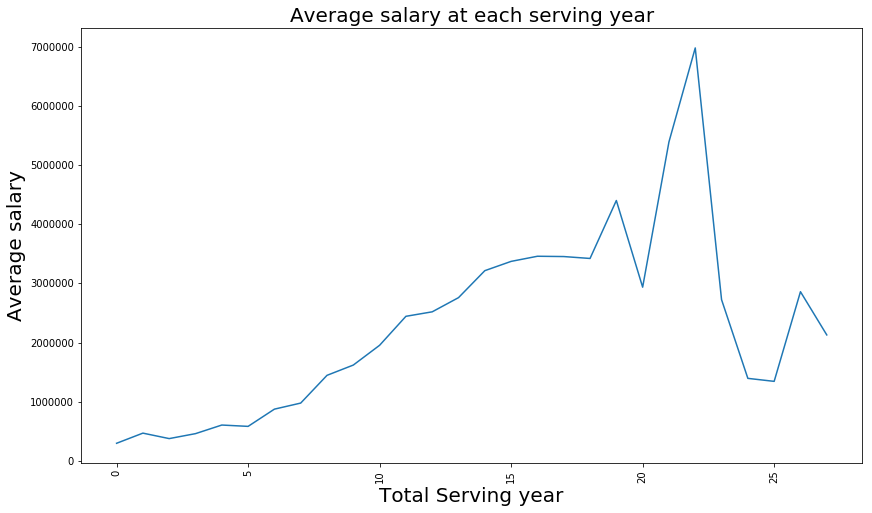

In [132]:
fig=plt.figure(figsize=(14,8))
ax=fig.add_subplot(111)
sns.lineplot("serving_year", "ave_salary", data = data)
    
ax.set_title("Average salary at each serving year",fontsize=20)
ax.set_xlabel("Total Serving year",fontsize=20)
ax.set_ylabel("Average salary",fontsize=20)
for tick in ax.get_xticklabels():
    tick.set_rotation("vertical")

ax

From the plot we can see as year serving for team, you will get more pay for it. But from the plot we also can see the highest salary happen at 20-25 years serving a team. After 25 years career, you salary wil start to decreas and there have a little bit increase after 25 years. 

That because the player have 20 years experience is the best age in the team, their perfermence is the best. After you serving the team after 25 year, you will considering to retire. we also know from the plot that when the player get more in the team they will get more payment.